# **Import CSV file(From Tweets extraction)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import tweepy
import re
import sys

In [ ]:
pip install vaderSentiment

# **Vader Sentiment Analysis**

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: ignored

In [ ]:
import pandas as pd
dfr = pd.read_csv('brand.csv')
print (dfr)

       No.  ...                                              tweet
0        1  ...  RT @gaadiwaadi: Tata Posts 38% Growth In Nov 2...
1        2  ...  Tata Posts 38% Growth In Nov 2021 – Nexon, Alt...
2        3  ...  Hi friends I am a Giveway hunter and i will op...
3        4  ...  @aamir_akhtar75 @MahindraXUV700 @carandbike @A...
4        5  ...  11,000 km in 5 months with my Tata Safari: Own...
...    ...  ...                                                ...
1817  1818  ...  RT @MahindraXUV700: At Pothens Mahindra, Kolla...
1818  1819  ...  Alexa in XUV700 says MG Hector is better😳😛 #bu...
1819  1820  ...  So even XUV700 agrees MG Hector is a better ca...
1820  1821  ...  RT @MahindraXUV700: The celebrations begin ear...
1821  1822  ...  RT @MahindraXUV700: The celebrations begin ear...

[1822 rows x 4 columns]


In [ ]:
#convert array to dataframe
df = pd.DataFrame.from_dict(dfr)
df

,No.,Brand,location,tweet
0,1,Tata Safari,Ahmednagar (Maharashtra),RT @gaadiwaadi: Tata Posts 38% Growth In Nov 2...
1,2,Tata Safari,India,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt..."
2,3,Tata Safari,NaN,Hi friends I am a Giveway hunter and i will op...
3,4,Tata Safari,"Sonipat, India",@aamir_akhtar75 @MahindraXUV700 @carandbike @A...
4,5,Tata Safari,India,"11,000 km in 5 months with my Tata Safari: Own..."
...,...,...,...,...
1817,1818,Mahindra XUV 700,"London, United Kingdom","RT @MahindraXUV700: At Pothens Mahindra, Kolla..."
1818,1819,Mahindra XUV 700,"Chennai, India",Alexa in XUV700 says MG Hector is better😳😛 #bu...
1819,1820,Mahindra XUV 700,In your heart❤,So even XUV700 agrees MG Hector is a better ca...
1820,1821,Mahindra XUV 700,NaN,RT @MahindraXUV700: The celebrations begin ear...


In [ ]:
del df["No."]

In [ ]:
#tweets of only Tata Safari 
df_Tata = df[ df['Brand'] == 'Tata Safari']
df_Tata

,Brand,location,tweet
0,Tata Safari,Ahmednagar (Maharashtra),RT @gaadiwaadi: Tata Posts 38% Growth In Nov 2...
1,Tata Safari,India,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt..."
2,Tata Safari,NaN,Hi friends I am a Giveway hunter and i will op...
3,Tata Safari,"Sonipat, India",@aamir_akhtar75 @MahindraXUV700 @carandbike @A...
4,Tata Safari,India,"11,000 km in 5 months with my Tata Safari: Own..."
...,...,...,...
114,Tata Safari,India,Review of 3 new features in my Tata Safari\n\n...
115,Tata Safari,NaN,@TataMotors_Cars I made a mistake of consdrng ...
116,Tata Safari,"Sahibganj, India",RT @TataMotors_Cars: Gunjan feels the freedom ...
117,Tata Safari,NaN,Gunjan feels the freedom of her spirit take fl...


In [ ]:
#tweets of only Mahindra XUV 7OO 
df_Mahindra = df[ df['Brand'] == 'Mahindra XUV 700']
df_Mahindra

,Brand,location,tweet
119,Mahindra XUV 700,NaN,"53 Days post booking the XUV700, yet no update..."
120,Mahindra XUV 700,India,Mahindra XUV700 AX7 Smart Without ADAS Launch ...
121,Mahindra XUV 700,bangalore,@MahindraXUV700 @anandmahindra \nI have booked...
122,Mahindra XUV 700,NaN,"Mr. Mahindra, Appreciate your response. We wil..."
123,Mahindra XUV 700,"Bareilly, UP, India (243001)",The winning streak is never-ending when it com...
...,...,...,...
1817,Mahindra XUV 700,"London, United Kingdom","RT @MahindraXUV700: At Pothens Mahindra, Kolla..."
1818,Mahindra XUV 700,"Chennai, India",Alexa in XUV700 says MG Hector is better😳😛 #bu...
1819,Mahindra XUV 700,In your heart❤,So even XUV700 agrees MG Hector is a better ca...
1820,Mahindra XUV 700,NaN,RT @MahindraXUV700: The celebrations begin ear...


# **Cleaning Data**

In [ ]:
#cleaning  tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")

    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [ ]:
df['tweet'] = clean_tweets(df['tweet'])
df

,Brand,location,tweet
0,Tata Safari,Ahmednagar (Maharashtra),"Tata Posts 38% Growth In Nov 2021 – Nexon, Al..."
1,Tata Safari,India,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt..."
2,Tata Safari,NaN,Hi friends I am a Giveway hunter and i will op...
3,Tata Safari,"Sonipat, India",Look for other dealer Tata Safari is avail...
4,Tata Safari,India,"11,000 km in 5 months with my Tata Safari: Own..."
...,...,...,...
1817,Mahindra XUV 700,"London, United Kingdom","At Pothens Mahindra, Kollam, we delivered the..."
1818,Mahindra XUV 700,"Chennai, India",Alexa in XUV700 says MG Hector is better😳😛 #bu...
1819,Mahindra XUV 700,In your heart❤,So even XUV700 agrees MG Hector is a better ca...
1820,Mahindra XUV 700,NaN,The celebrations begin early as we deliver 70...


In [ ]:
df_Tata = df[ df['Brand'] == 'Tata Safari']
df_Tata

,Brand,location,tweet
0,Tata Safari,Ahmednagar (Maharashtra),"Tata Posts 38% Growth In Nov 2021 – Nexon, Al..."
1,Tata Safari,India,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt..."
2,Tata Safari,NaN,Hi friends I am a Giveway hunter and i will op...
3,Tata Safari,"Sonipat, India",Look for other dealer Tata Safari is avail...
4,Tata Safari,India,"11,000 km in 5 months with my Tata Safari: Own..."
...,...,...,...
114,Tata Safari,India,Review of 3 new features in my Tata Safari\n\n
115,Tata Safari,NaN,I made a mistake of consdrng a Tata .Hv not b...
116,Tata Safari,"Sahibganj, India",Gunjan feels the freedom of her spirit take f...
117,Tata Safari,NaN,Gunjan feels the freedom of her spirit take fl...


In [ ]:
df_Mahindra = df[ df['Brand'] == 'Mahindra XUV 700']
df_Mahindra

,Brand,location,tweet
119,Mahindra XUV 700,NaN,"53 Days post booking the XUV700, yet no update..."
120,Mahindra XUV 700,India,Mahindra XUV700 AX7 Smart Without ADAS Launch ...
121,Mahindra XUV 700,bangalore,\nI have booked my xuv700 in the month of Oc...
122,Mahindra XUV 700,NaN,"Mr. Mahindra, Appreciate your response. We wil..."
123,Mahindra XUV 700,"Bareilly, UP, India (243001)",The winning streak is never-ending when it com...
...,...,...,...
1817,Mahindra XUV 700,"London, United Kingdom","At Pothens Mahindra, Kollam, we delivered the..."
1818,Mahindra XUV 700,"Chennai, India",Alexa in XUV700 says MG Hector is better😳😛 #bu...
1819,Mahindra XUV 700,In your heart❤,So even XUV700 agrees MG Hector is a better ca...
1820,Mahindra XUV 700,NaN,The celebrations begin early as we deliver 70...


In [ ]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['tweet'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['tweet'][i])["compound"]
    pos = analyzer.polarity_scores(df['tweet'][i])["pos"]
    neu = analyzer.polarity_scores(df['tweet'][i])["neu"]
    neg = analyzer.polarity_scores(df['tweet'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [ ]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,Brand,location,tweet,Compound,Positive,Negative,Neutral
0,Tata Safari,Ahmednagar (Maharashtra),"Tata Posts 38% Growth In Nov 2021 – Nexon, Al...",0.3818,0.178,0.0,0.822
1,Tata Safari,India,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt...",0.3818,0.178,0.0,0.822
2,Tata Safari,NaN,Hi friends I am a Giveway hunter and i will op...,0.4767,0.129,0.0,0.871
3,Tata Safari,"Sonipat, India",Look for other dealer Tata Safari is avail...,0.3612,0.200,0.0,0.800
4,Tata Safari,India,"11,000 km in 5 months with my Tata Safari: Own...",0.0000,0.000,0.0,1.000


In [ ]:
place_count = pd.DataFrame.from_dict(df['location'].value_counts())
place_count.head(10)

,location
India,75
"New Delhi, India",64
Moon,45
"Hyderabad, India",45
"Pune, India",44
Mumbai,44
"Bengaluru, India",32
"Mumbai, India",28
"Chennai, India",24
"Lucknow, India",21


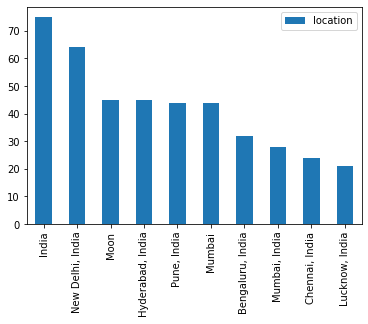

In [ ]:
place_count.head(10).plot(kind='bar')

In [ ]:
place_count_Mahindra= pd.DataFrame.from_dict(df_Mahindra['location'].value_counts())
place_count_Mahindra.head(10)

,location
India,69
"New Delhi, India",62
Moon,45
Mumbai,43
"Hyderabad, India",42
"Pune, India",41
"Bengaluru, India",32
"Chennai, India",24
"Mumbai, India",23
"Gujarat, India",20


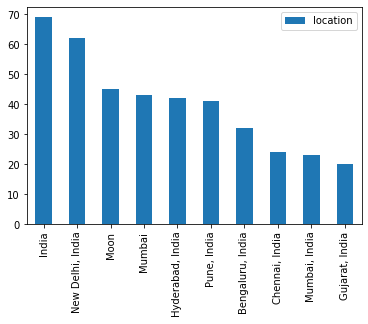

In [ ]:
place_count_Mahindra.head(10).plot(kind='bar')

In [ ]:
place_count_Tata = pd.DataFrame.from_dict(df_Tata['location'].value_counts())
place_count_Tata.head(10)

,location
"Gurgaon, India",8
India,6
"Mumbai, India",5
Delhi,4
"Maharashtra, India",4
"Pune, India",3
"Rajkot, India",3
"Hyderabad, India",3
kudligi,2
"Shimoga,Karnataka",2


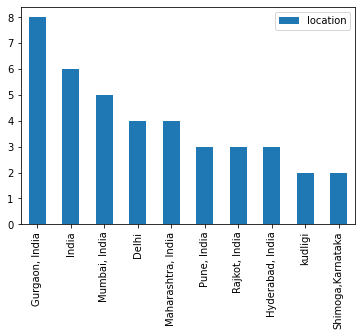

In [ ]:
place_count_Tata.head(10).plot(kind='bar')

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

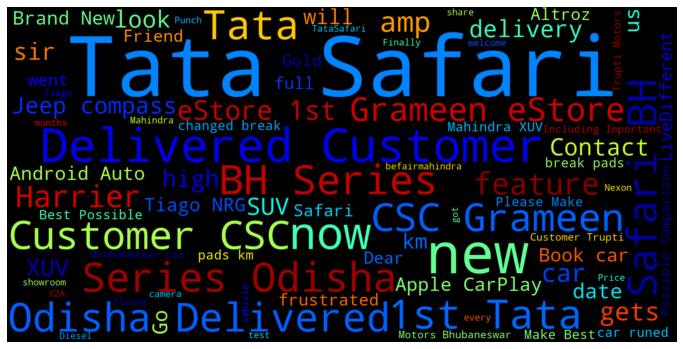

In [ ]:
word_cloud(df_Tata['tweet'])

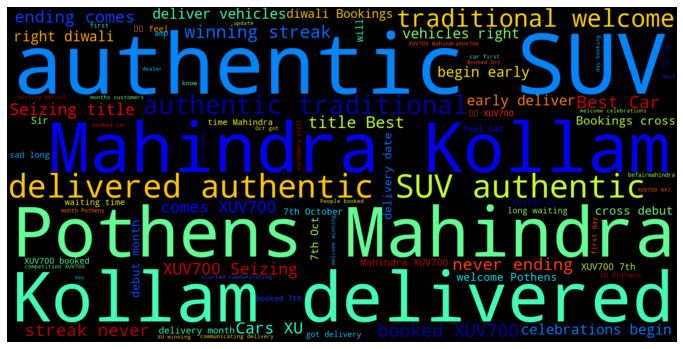

In [ ]:
word_cloud(df_Mahindra['tweet'])

In [ ]:
#Collect the compound values for each news source
score_table = df.pivot_table(index='Brand',  values="Compound", aggfunc = np.mean)
score_table

,Compound
Brand,
Mahindra XUV 700,0.191035
Tata Safari,0.171880


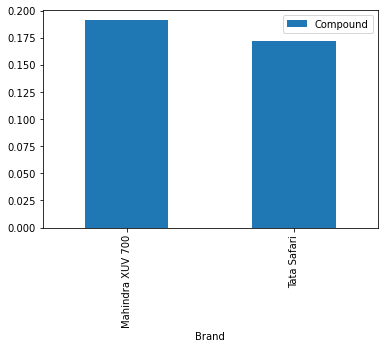

In [ ]:
#plotting 
score_table.plot(kind='bar')

In [ ]:
#Collect the negative values for each news source
neg_score_table = df.pivot_table(index='Brand',  values="Negative", aggfunc = np.mean)
neg_score_table

,Negative
Brand,
Mahindra XUV 700,0.041314
Tata Safari,0.027933


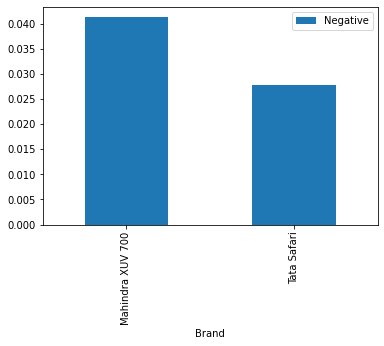

In [ ]:
#plotting 
neg_score_table.plot(kind='bar')

In [ ]:
#Collect the positive values for each news source
pos_score_table = df.pivot_table(index='Brand',  values="Positive", aggfunc = np.mean)
pos_score_table

,Positive
Brand,
Mahindra XUV 700,0.113603
Tata Safari,0.091983


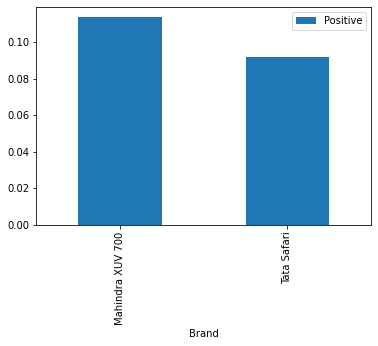

In [ ]:
#plotting 
pos_score_table.plot(kind='bar')

In [ ]:
#Collect the neutral values for each news source
neu_score_table = df.pivot_table(index='Brand',  values="Neutral", aggfunc = np.mean)
neu_score_table


,Neutral
Brand,
Mahindra XUV 700,0.845079
Tata Safari,0.880084


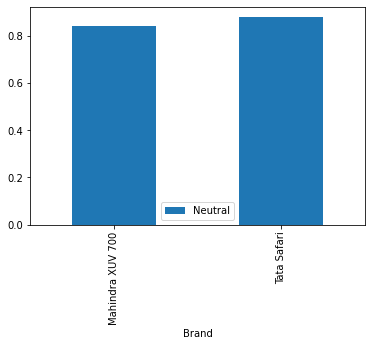

In [ ]:
#plotting 
neu_score_table.plot(kind='bar')

In [ ]:
result = pd.concat([score_table, pos_score_table, neg_score_table, neu_score_table], axis=1, join="outer")
result

,Compound,Positive,Negative,Neutral
Brand,,,,
Mahindra XUV 700,0.191035,0.113603,0.041314,0.845079
Tata Safari,0.171880,0.091983,0.027933,0.880084


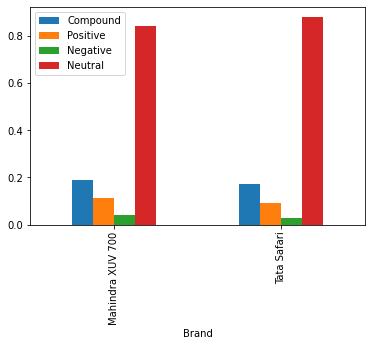

In [ ]:
result.plot(kind='bar')

In [ ]:
#labelling data 
def getAnalysis(score):
    if score < 0:
        return '-1'
    
    elif score==0:
        return '0'
    else:
      return '1'



In [ ]:
df['Analysis'] = df['Compound'].apply(getAnalysis)

In [ ]:
df

,Brand,location,tweet,Compound,Positive,Negative,Neutral,Analysis
0,Tata Safari,Ahmednagar (Maharashtra),"Tata Posts 38% Growth In Nov 2021 – Nexon, Al...",0.3818,0.178,0.0,0.822,1
1,Tata Safari,India,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt...",0.3818,0.178,0.0,0.822,1
2,Tata Safari,NaN,Hi friends I am a Giveway hunter and i will op...,0.4767,0.129,0.0,0.871,1
3,Tata Safari,"Sonipat, India",Look for other dealer Tata Safari is avail...,0.3612,0.200,0.0,0.800,1
4,Tata Safari,India,"11,000 km in 5 months with my Tata Safari: Own...",0.0000,0.000,0.0,1.000,0
...,...,...,...,...,...,...,...,...
1817,Mahindra XUV 700,"London, United Kingdom","At Pothens Mahindra, Kollam, we delivered the...",0.5093,0.180,0.0,0.820,1
1818,Mahindra XUV 700,"Chennai, India",Alexa in XUV700 says MG Hector is better😳😛 #bu...,0.4404,0.182,0.0,0.818,1
1819,Mahindra XUV 700,In your heart❤,So even XUV700 agrees MG Hector is a better ca...,0.8387,0.302,0.0,0.698,1
1820,Mahindra XUV 700,NaN,The celebrations begin early as we deliver 70...,0.0000,0.000,0.0,1.000,0


In [ ]:
from google.colab import files
df.to_csv('dataset1.1.csv') 
files.download('dataset1.1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

del df["location"]
del df["Brand"]
del df["Compound"]
del df["Positive"]
del df["Negative"]
del df["Neutral"]



In [ ]:
df

,Brand,location,tweet,Compound,Positive,Negative,Neutral,Analysis
0,Tata Safari,Ahmednagar (Maharashtra),"Tata Posts 38% Growth In Nov 2021 – Nexon, Al...",0.3818,0.178,0.0,0.822,1
1,Tata Safari,India,"Tata Posts 38% Growth In Nov 2021 – Nexon, Alt...",0.3818,0.178,0.0,0.822,1
2,Tata Safari,NaN,Hi friends I am a Giveway hunter and i will op...,0.4767,0.129,0.0,0.871,1
3,Tata Safari,"Sonipat, India",Look for other dealer Tata Safari is avail...,0.3612,0.200,0.0,0.800,1
4,Tata Safari,India,"11,000 km in 5 months with my Tata Safari: Own...",0.0000,0.000,0.0,1.000,0
...,...,...,...,...,...,...,...,...
1817,Mahindra XUV 700,"London, United Kingdom","At Pothens Mahindra, Kollam, we delivered the...",0.5093,0.180,0.0,0.820,1
1818,Mahindra XUV 700,"Chennai, India",Alexa in XUV700 says MG Hector is better😳😛 #bu...,0.4404,0.182,0.0,0.818,1
1819,Mahindra XUV 700,In your heart❤,So even XUV700 agrees MG Hector is a better ca...,0.8387,0.302,0.0,0.698,1
1820,Mahindra XUV 700,NaN,The celebrations begin early as we deliver 70...,0.0000,0.000,0.0,1.000,0


In [ ]:
from google.colab import files
df.to_csv('dataset2.0.csv') 
files.download('dataset2.0.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_Mahindra1 = df[ df['Brand'] == 'Mahindra XUV 700']
df_Mahindra1